## Actividad Integradora 3

### Data collection and processing

In [1]:
# Importación de librerias
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import os
import time
import requests
import cv2
import urllib
import glob
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class Page(object):
    def __init__(self, driver):
        self.driver = driver
        self.wait = WebDriverWait(driver, WAIT_TIME)

class SearchPage(Page):
    def get_images_URLs(self):
        global total
        URLs = []
        i = 0
        image_tags = self.driver.find_elements_by_css_selector("img.z_h_9d80b.z_h_2f2f0")
            
        while(total < amt and i < len(image_tags)):
            src = image_tags[i].get_attribute("src")
            URLs.append(src)
            i = i + 1
            total = total + 1
            #print("Found image with src: ", src)
            #print("Total: ", total)
        return URLs
        
    def scroll_down(self):
        #print("Scrolling down...")
        # Scroll to the bottom of the page
        self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight)") 
        # Wait 4 seconds for all the images to load
        self.wait.until(lambda d: d.find_element_by_css_selector("a[data-automation='BottomNav_NextButton']"))
        #print("Waiting for images to load...")
        time.sleep(5)
        
        
    def go_next(self):
        print("Changing page...")
        next_btn = self.driver.find_element_by_css_selector("a[data-automation='BottomNav_NextButton']");
        self.driver.execute_script("arguments[0].click();", next_btn)
        #next_btn.click();
        print("Waiting for images to load...")
        time.sleep(5)
        #print(self.driver.title)
    
class MainPage(Page):
    def search_term(self, term):
        elem = self.driver.find_element_by_name("searchterm")
        elem.clear()
        elem.send_keys(term)
        elem.send_keys(Keys.RETURN)
        self.wait.until(lambda d: term in d.title.lower())
WAIT_TIME = 30
URLs = {}

In [3]:
def getURLs(terms): 
    with webdriver.Firefox() as driver:
        driver.maximize_window()
        driver.get("https://www.shuttersotck.com")
        main_page = MainPage(driver)
        
        for i in range(0,terms):
            term = input("Introduce el término de búsqueda: ")
            term = term.lower()
            global amt,total
            total = 0
            amt = input("Introduce la cantidad de imágenes que deseas obtener: ")
            amt = int(amt)
            temp_URLs = []

            main_page.search_term(term)
            search_page = SearchPage(driver)
            search_page.scroll_down()

            while((page_images_URLs:= search_page.get_images_URLs()) and len(temp_URLs) < amt):
                temp_URLs.extend(page_images_URLs)
                search_page.go_next()
                search_page.scroll_down()
            URLs[term] = temp_URLs

In [4]:
def url2img(link):
    '''
    :param link: URLs de imagenes recolectadas.
    :return: imagen correspondiente al link proporcionado. 
    '''
    with urllib.request.urlopen(link) as link:
        source = link.read()
    img = np.asarray(bytearray(source), dtype="uint8")
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)

    return img

In [5]:
def img_transfer(links,path,key):
    '''
    :param links: links separados para folder train o test.
    :param path: path dir.
    :return: guardado de las imagenes en sus respectivos folders.
    '''
    itr = 0
    for m in links:
        img = url2img(m) 
        img_name = key + str(itr) + '.jpg'
        cv2.imwrite(os.path.join(path, img_name), img)
        itr += 1
    return

In [6]:
getURLs(5)

Introduce el término de búsqueda: pizza
Introduce la cantidad de imágenes que deseas obtener: 800
Changing page...
Waiting for images to load...
Changing page...
Waiting for images to load...
Changing page...
Waiting for images to load...
Changing page...
Waiting for images to load...
Changing page...
Waiting for images to load...
Changing page...
Waiting for images to load...
Changing page...
Waiting for images to load...
Changing page...
Waiting for images to load...
Introduce el término de búsqueda: tacos
Introduce la cantidad de imágenes que deseas obtener: 800
Changing page...
Waiting for images to load...
Changing page...
Waiting for images to load...
Changing page...
Waiting for images to load...
Changing page...
Waiting for images to load...
Changing page...
Waiting for images to load...
Changing page...
Waiting for images to load...
Changing page...
Waiting for images to load...
Changing page...
Waiting for images to load...
Introduce el término de búsqueda: spaguetti
Introduc

In [7]:
keys = list(URLs.keys())

for k in range(0,len(keys)):
    n_train = int(len(URLs[keys[k]])*0.8)
    n_val = int(len(URLs[keys[k]])*0.13)
    train_URLs = []
    test_URLs = []
    val_URLs = []
    itr = 0
    for n in URLs[keys[k]]:
        if itr < n_train:
            train_URLs.append(n)
        elif (itr >= n_train) and (itr < n_val+n_train):
            val_URLs.append(n)
        else:
            test_URLs.append(n)
        itr += 1
    # Recolectando imagenes para train, test y validation
    path1 = r'data\train\\' + keys[k]
    path2 = r'data\test\\' + keys[k]
    path3 = r'data\valid\\' + keys[k]
    try:
        os.makedirs(path1)
        os.makedirs(path2)
        os.makedirs(path3)
    except:
        print("Directory " , path1 , "or ", path2, "or ", path3, " already exists")
    img_transfer(train_URLs,path1,keys[k])
    img_transfer(test_URLs,path2,keys[k])
    img_transfer(val_URLs,path3,keys[k])

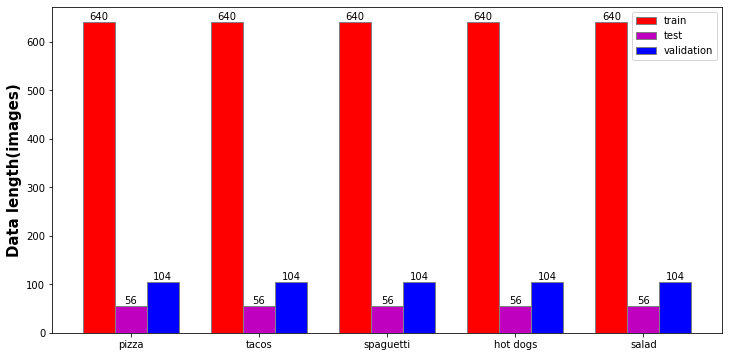

In [30]:
folders = ['train','test','valid']
num_train = []
num_test = []
num_valid = []
for i in folders:
    for j in keys:
        dir1 = 'data/' + i
        dir2 = j + '/*'    
        os.chdir(dir1)
        if i == 'train':
            num_train.append(len(glob.glob(dir2)))
        elif i == 'test':
            num_test.append(len(glob.glob(dir2)))
        elif i == 'valid':
            num_valid.append(len(glob.glob(dir2)))
        os.chdir('../../')

# set width of bar
barWidth = 0.25

fig = plt.subplots(figsize =(12, 6))

# Set position of bar on X axis
br1 = np.arange(len(num_train))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

p1 = plt.bar(br1, num_train, color ='r', width = barWidth,
        edgecolor ='grey', label ='train')
plt.bar(br2, num_test, color ='m', width = barWidth,
        edgecolor ='grey', label ='test')
plt.bar(br3, num_valid, color ='b', width = barWidth,
        edgecolor ='grey', label ='validation')

plt.ylabel('Data length(images)', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(num_train))],keys)


for i in range(len(keys)):
        plt.text(i, num_train[i]+5, num_train[i], ha = 'center')
        plt.text(i+0.25, num_test[i]+5, num_test[i], ha = 'center')
        plt.text(i+0.5, num_valid[i]+5, num_valid[i], ha = 'center')
plt.legend()
plt.show()

### Data Preparation

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [3]:
FOODS = ["hot dogs", "pizza", "spaguetti", "salad", "tacos"]

# Make sure data is organized
os.chdir("data/")
for food in FOODS:
    assert os.path.isdir(f'test/{food}')
    assert os.path.isdir(f'train/{food}')
    assert os.path.isdir(f'valid/{food}')
os.chdir("../")

In [4]:
train_path = 'data/train'
valid_path = 'data/valid'
test_path = 'data/test'

In [5]:
# processing images with vgg
# flow from directory specifies how to process data
#    train_path,  target_size(height,width) of every image, classes are potential labels
# test batches shuffle
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=FOODS, batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=FOODS, batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=FOODS, batch_size=10, shuffle=False)

Found 3200 images belonging to 5 classes.
Found 520 images belonging to 5 classes.
Found 280 images belonging to 5 classes.


In [6]:
# Generate a batch of images and labels from the training set.
imgs, labels = next(train_batches)

In [7]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are placed
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

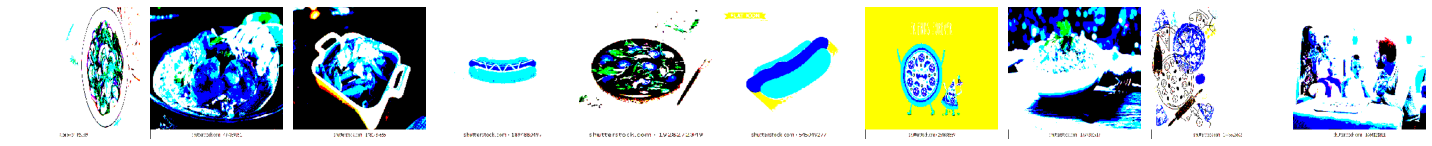

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [8]:
plotImages(imgs)
print(labels)

### Build Fine-tuned VGG16 model

In [9]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [10]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
# Does not include output layers
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [12]:
# New output layers with size of our classes
model.add(Dense(units=len(FOODS), activation='softmax'))

In [13]:
# Freezing layers
for layer in model.layers[:-1]:
    layer.trainable = False

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

### Train the fine-tuned VGG16 model

In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Try training with 5 epochs
model1 = model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
320/320 - 58s - loss: 1.1084 - accuracy: 0.5925 - val_loss: 0.7738 - val_accuracy: 0.7135
Epoch 2/5
320/320 - 49s - loss: 0.6241 - accuracy: 0.7619 - val_loss: 0.6530 - val_accuracy: 0.7654
Epoch 3/5
320/320 - 50s - loss: 0.5032 - accuracy: 0.8166 - val_loss: 0.6097 - val_accuracy: 0.7692
Epoch 4/5
320/320 - 51s - loss: 0.4335 - accuracy: 0.8444 - val_loss: 0.6144 - val_accuracy: 0.7942
Epoch 5/5
320/320 - 51s - loss: 0.3768 - accuracy: 0.8659 - val_loss: 0.5865 - val_accuracy: 0.7904


##### Con 5 epochs se llega a tener un validation_accuracy del 79.04%

### Predict using fine-tuned VGG16 model and evaluation

In [19]:
predictions1 = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [20]:
cm1 = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions1, axis=-1))

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [22]:
test_batches.class_indices

{'hot dogs': 0, 'pizza': 1, 'spaguetti': 2, 'salad': 3, 'tacos': 4}

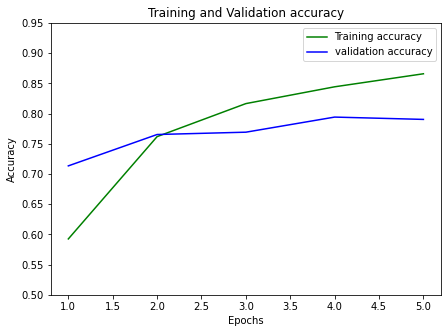

In [43]:
fig1 = plt.subplots(figsize =(7, 5))
loss_train = model1.history['accuracy']
loss_val = model1.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.yticks(np.arange(0.5, 1, 0.05))
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Confusion matrix, without normalization
[[44  4  3  1  4]
 [ 4 43  3  1  5]
 [ 0  0 55  0  1]
 [ 0  5  0 50  1]
 [ 6  8  4  1 37]]


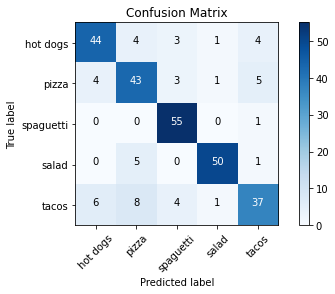

In [24]:
plot_confusion_matrix(cm=cm1, classes=FOODS, title='Confusion Matrix')

In [25]:
import os.path
# Checks to see if file exists already
# if not, the model is save to disk
if os.path.isfile('models/') is False:
    model.save('models/food_model_v1.h5')
# saves the architecture, the weights of the model, training configuration
# state optimizer, allowing to train where you left off

### Train and evaluation of the fine-tuned VGG16 model version 2 : More epochs

In [26]:
# Try training with 8 epochs
model2 = model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=8,
          verbose=2
)

Epoch 1/8
320/320 - 49s - loss: 0.3377 - accuracy: 0.8822 - val_loss: 0.5758 - val_accuracy: 0.8096
Epoch 2/8
320/320 - 50s - loss: 0.2980 - accuracy: 0.9019 - val_loss: 0.5715 - val_accuracy: 0.7942
Epoch 3/8
320/320 - 53s - loss: 0.2675 - accuracy: 0.9156 - val_loss: 0.6088 - val_accuracy: 0.8000
Epoch 4/8
320/320 - 52s - loss: 0.2450 - accuracy: 0.9281 - val_loss: 0.5471 - val_accuracy: 0.8115
Epoch 5/8
320/320 - 54s - loss: 0.2213 - accuracy: 0.9384 - val_loss: 0.5515 - val_accuracy: 0.8173
Epoch 6/8
320/320 - 54s - loss: 0.1995 - accuracy: 0.9491 - val_loss: 0.5711 - val_accuracy: 0.7981
Epoch 7/8
320/320 - 54s - loss: 0.1835 - accuracy: 0.9541 - val_loss: 0.5381 - val_accuracy: 0.8096
Epoch 8/8
320/320 - 56s - loss: 0.1705 - accuracy: 0.9581 - val_loss: 0.5428 - val_accuracy: 0.8154


###### Con 8 epochs se llega a tener un validation_accuracy del 81.54% - mejora que con 5 epochs (pero no muy significativo y más epochs pareciera que pudiera caer en overfitting)

In [27]:
predictions2 = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [28]:
cm2 = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions2, axis=-1))

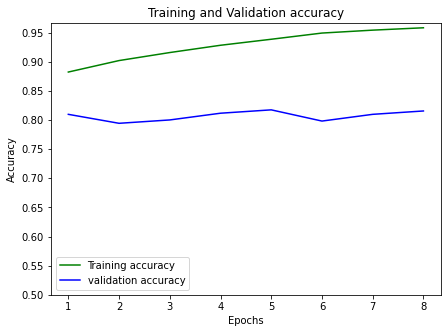

In [44]:
fig2 = plt.subplots(figsize =(7, 5))
loss_train = model2.history['accuracy']
loss_val = model2.history['val_accuracy']
epochs = range(1,9)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.yticks(np.arange(0.5, 1, 0.05))
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Confusion matrix, without normalization
[[47  1  3  1  4]
 [ 2 47  3  0  4]
 [ 0  0 56  0  0]
 [ 0  2  0 52  2]
 [ 4 10  2  0 40]]


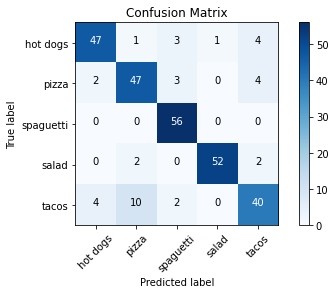

In [45]:
plot_confusion_matrix(cm=cm2, classes=FOODS, title='Confusion Matrix')

Nota: En ocaciones se le dificulta diferenciar entre tacos y pizza

In [46]:
import os.path
# Checks to see if file exists already
# if not, the model is save to disk
if os.path.isfile('models/') is False:
    model.save('models/food_model_v2.h5')
# saves the architecture, the weights of the model, training configuration
# state optimizer, allowing to train where you left off

### Train and evaluation of the fine-tuned VGG16 model version 3: Freeze other layers

In [47]:
# Freezing layers 
for layer in model.layers[:-1]:
    layer.trainable = True
for layer in model.layers[:-2]:
    layer.trainable = False

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [49]:
# Try training with 8 epochs
model3 = model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=8,
          verbose=2
)

Epoch 1/8
320/320 - 51s - loss: 0.1559 - accuracy: 0.9625 - val_loss: 0.5345 - val_accuracy: 0.8212
Epoch 2/8
320/320 - 56s - loss: 0.1420 - accuracy: 0.9703 - val_loss: 0.5572 - val_accuracy: 0.8000
Epoch 3/8
320/320 - 56s - loss: 0.1308 - accuracy: 0.9737 - val_loss: 0.5441 - val_accuracy: 0.8038
Epoch 4/8
320/320 - 62s - loss: 0.1205 - accuracy: 0.9791 - val_loss: 0.5533 - val_accuracy: 0.8135
Epoch 5/8
320/320 - 74s - loss: 0.1122 - accuracy: 0.9812 - val_loss: 0.5434 - val_accuracy: 0.8077
Epoch 6/8
320/320 - 75s - loss: 0.1036 - accuracy: 0.9841 - val_loss: 0.5533 - val_accuracy: 0.8096
Epoch 7/8
320/320 - 79s - loss: 0.0962 - accuracy: 0.9875 - val_loss: 0.5694 - val_accuracy: 0.8019
Epoch 8/8
320/320 - 76s - loss: 0.0891 - accuracy: 0.9891 - val_loss: 0.5514 - val_accuracy: 0.8077


##### Con 8 epochs se llega a tener un validation_accuracy del 80.77%

In [51]:
predictions3 = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [52]:
cm3 = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions3, axis=-1))

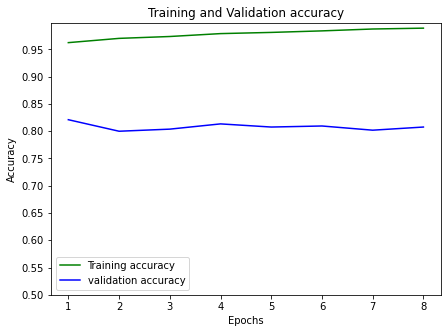

In [58]:
fig3 = plt.subplots(figsize =(7, 5))
loss_train = model3.history['accuracy']
loss_val = model3.history['val_accuracy']
epochs = range(1,9)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.yticks(np.arange(0.5, 1, 0.05))
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Confusion matrix, without normalization
[[47  2  2  2  3]
 [ 3 46  2  1  4]
 [ 0  0 56  0  0]
 [ 0  1  0 53  2]
 [ 3 10  2  0 41]]


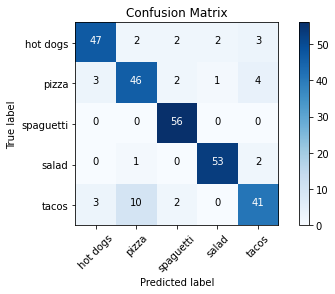

In [55]:
plot_confusion_matrix(cm=cm3, classes=FOODS, title='Confusion Matrix')

In [56]:
import os.path
# Checks to see if file exists already
# if not, the model is save to disk
if os.path.isfile('models/') is False:
    model.save('models/food_model_v3.h5')
# saves the architecture, the weights of the model, training configuration
# state optimizer, allowing to train where you left off

## Mejor modelo es la version 2 con 8 epochs

In [1]:
from tensorflow.keras.models import load_model
best_model = load_model('models/food_model_v2.h5')

In [2]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2